In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_excel(r"E:\Data Science\Assignment-4\play.xlsx")
print(df)

     Outlook  Temperature  Humidity   Windy   Decision
0   overcast           72        90  strong       play
1   overcast           83        78    weak       play
2   overcast           64        65  strong       play
3   overcast           81        75    weak       play
4      sunny           75        70  strong       play
5      sunny           80        90  strong  dont_play
6      sunny           85        85    weak  dont_play
7      sunny           72        95    weak  dont_play
8      sunny           69        70    weak       play
9       rain           71        80  strong  dont_play
10      rain           65        70  strong  dont_play
11      rain           75        80    weak       play
12      rain           68        80    weak       play
13      rain           70        96    weak       play


In [149]:
x = df[['Outlook','Temperature','Humidity','Windy']]

In [150]:
x.shape

(14, 4)

In [151]:
df.Decision.unique()

array(['play', 'dont_play'], dtype=object)

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
le_Outlook = LabelEncoder()
le_Windy = LabelEncoder()
le_Decision = LabelEncoder()

In [154]:
df['Outlook_n'] = le_Outlook.fit_transform(df['Outlook'])
df['Windy_n'] = le_Windy.fit_transform(df['Windy'])
df['Decision_n'] = le_Decision.fit_transform(df['Decision'])
df.head()

,Outlook,Temperature,Humidity,Windy,Decision,Outlook_n,Windy_n,Decision_n
0,overcast,72,90,strong,play,0,0,1
1,overcast,83,78,weak,play,0,1,1
2,overcast,64,65,strong,play,0,0,1
3,overcast,81,75,weak,play,0,1,1
4,sunny,75,70,strong,play,2,0,1


In [155]:
data = df.drop(['Outlook','Windy','Decision'],axis="columns")
data

,Temperature,Humidity,Outlook_n,Windy_n,Decision_n
0,72,90,0,0,1
1,83,78,0,1,1
2,64,65,0,0,1
3,81,75,0,1,1
4,75,70,2,0,1
5,80,90,2,0,0
6,85,85,2,1,0
7,72,95,2,1,0
8,69,70,2,1,1
9,71,80,1,0,0


In [156]:
x1 = df[['Outlook_n','Temperature','Humidity','Windy_n','Decision_n']]

In [157]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

In [158]:
x = df['Temperature']
y = df['Humidity']
z = df['Windy_n']

C:\Users\parjita\AppData\Local\Temp\ipykernel_20920\2333603340.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


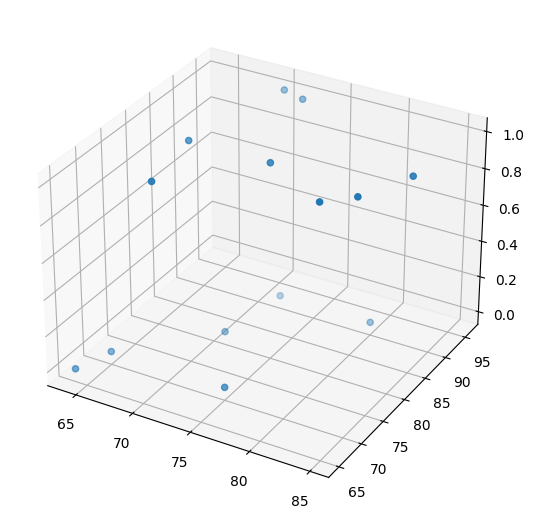

In [159]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x, y ,z)

Text(0, 0.5, 'Dissimilarities')

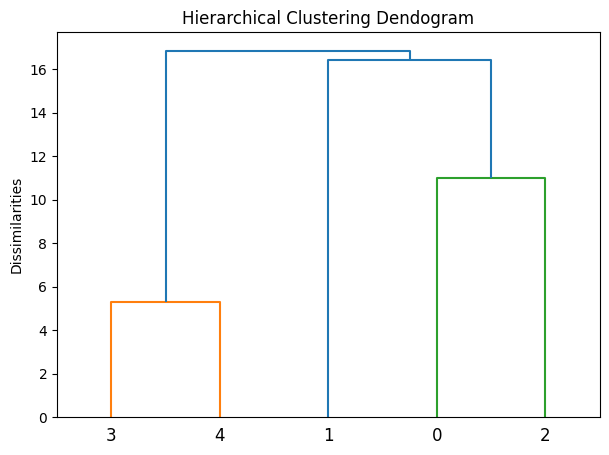

In [160]:
#single linkage

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

hc = AgglomerativeClustering(n_clusters = 5,linkage = "single")
hc = hc.fit(x1)
hc.labels_

linkage = linkage(x1.sample(n=5,random_state=1), 'single')

plt.figure(figsize=(7,5))

dendrogram(linkage,orientation='top')
plt.title("Hierarchical Clustering Dendogram")
plt.ylabel("Dissimilarities")
#plt.xlabel("Data Points")

Text(0.5, 0, 'Data Points')

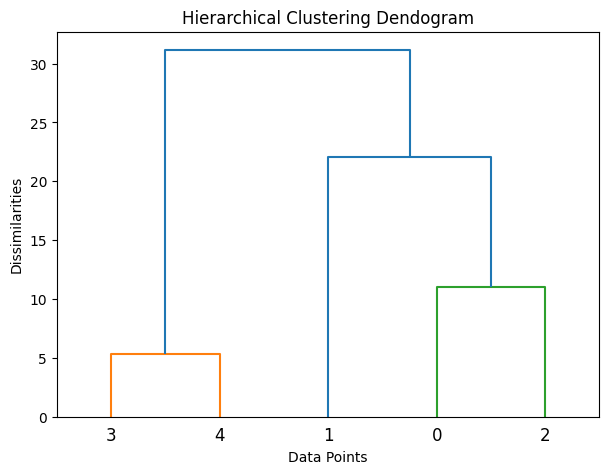

In [161]:
#multiple linkage

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

hc = AgglomerativeClustering(n_clusters = 5,linkage = "complete")
hc = hc.fit(x1)
hc.labels_

linkage = linkage(x1.sample(n=5,random_state=1), 'complete')

plt.figure(figsize=(7,5))

dendrogram(linkage,orientation='top')
plt.title("Hierarchical Clustering Dendogram")
plt.ylabel("Dissimilarities")
plt.xlabel("Data Points")

Text(0.5, 0, 'Data Points')

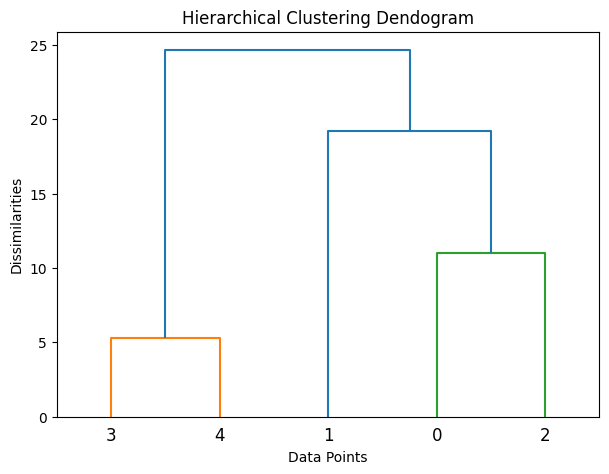

In [162]:
#Average linkage

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

hc = AgglomerativeClustering(n_clusters = 5,linkage = "average")
hc = hc.fit(x1)
hc.labels_

linkage = linkage(x1.sample(n=5,random_state=1), 'average')

plt.figure(figsize=(7,5))

dendrogram(linkage,orientation='top')
plt.title("Hierarchical Clustering Dendogram")
plt.ylabel("Dissimilarities")
plt.xlabel("Data Points")

Text(0.5, 0, 'Data Points')

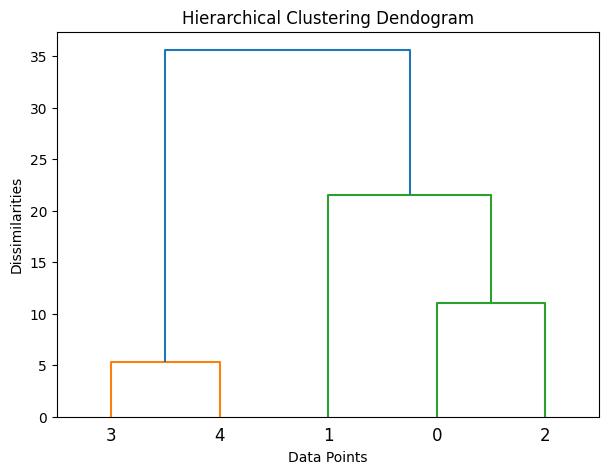

In [163]:
#Ward linkage

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

hc = AgglomerativeClustering(n_clusters = 5,linkage = "ward")
hc = hc.fit(x1)
hc.labels_

linkage = linkage(x1.sample(n=5,random_state=1), 'ward')

plt.figure(figsize=(7,5))

dendrogram(linkage,orientation='top')
plt.title("Hierarchical Clustering Dendogram")
plt.ylabel("Dissimilarities")
plt.xlabel("Data Points")